# Finstat

In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import dates
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from osgeo import gdal, osr, ogr
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print("Python version: %s"%python_version())
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print('GDAL version: %s'%gdal.__version__)
print("GeoPandas version: %s"%gpd.__version__)

Python version: 3.11.5
NumPy version: 1.25.2
Pandas version: 2.1.1
GDAL version: 3.7.2
GeoPandas version: 0.14.0


In [14]:
path_google_ds = 'data/GOOG.csv'
google_tmp_df = pd.read_csv(path_google_ds)
google_tmp_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000


In [15]:
day_index = pd.to_datetime(google_tmp_df['Date'])
google_tmp_df.drop(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
google_df = google_tmp_df.set_index(day_index)
google_df.head(3)

,Close
Date,
2019-01-02,52.292500
2019-01-03,50.803001
2019-01-04,53.535500


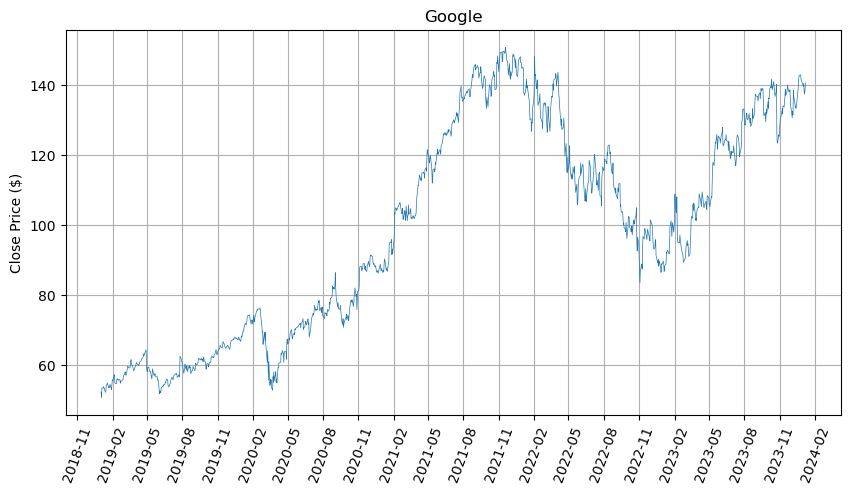

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Google')
ax.set_ylabel('Close Price ($)')
ax.set_xticks(google_df.index)
ax.set_xticklabels(google_df.index, rotation=70)
ax.xaxis.set_major_locator(mdates.MonthLocator([2, 5, 8, 11]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt_google = ax.plot(google_df, linewidth=0.5, label='google')
#plt.legend(loc='upper left')

In [42]:
ADF_result = adfuller(google_df)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.2587556157629054
p-value: 0.6478242308425972


In [39]:
google_close_diff = np.diff(google_df['Close'], n=1)
google_close_diff_df = pd.DataFrame({'Diff': google_close_diff}, index=day_index[1:])

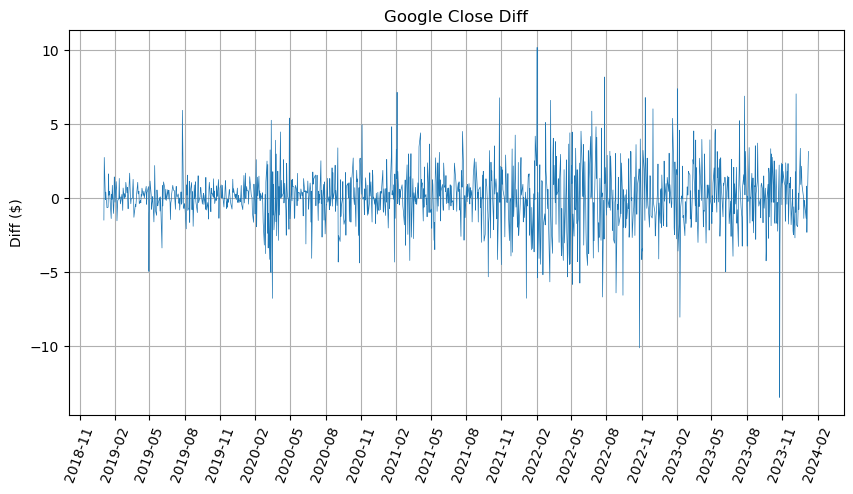

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Google Close Diff')
ax.set_ylabel('Diff ($)')
ax.set_xticks(google_close_diff_df.index)
ax.set_xticklabels(google_close_diff_df.index, rotation=70)
ax.xaxis.set_major_locator(mdates.MonthLocator([2, 5, 8, 11]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt_google_diff = ax.plot(google_close_diff_df, linewidth=0.5, label='google')
#plt.legend(loc='upper left')

In [43]:
ADF_result = adfuller(google_close_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -37.011103477336206
p-value: 0.0


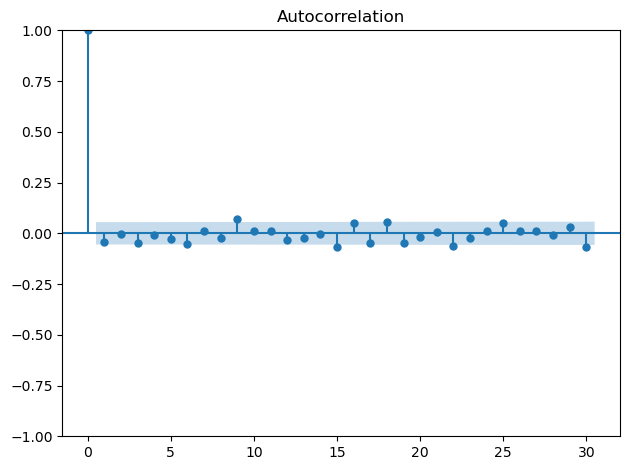

In [44]:
plot_acf(google_close_diff, lags=30);
plt.tight_layout()

In [46]:
train = google_close_diff[:int(0.9*len(google_close_diff))]
test = google_close_diff[int(0.9*len(google_close_diff)):]
print(len(train))
print(len(test))

1135
127


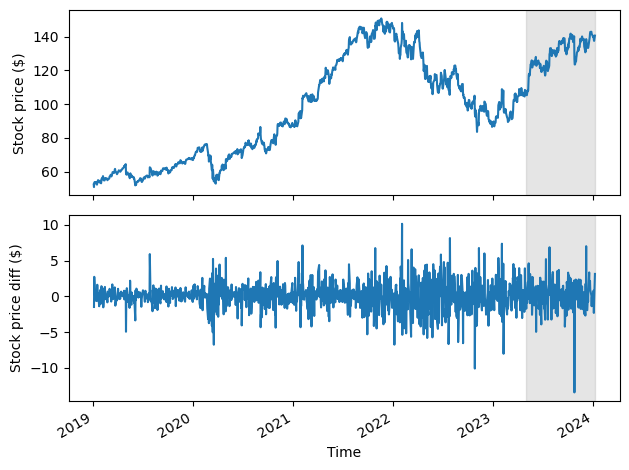

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.plot(google_df['Close'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock price ($)')
ax1.axvspan('2023-05-01', '2024-01-08', color='#808080', alpha=0.2)

ax2.plot(google_close_diff_df['Diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Stock price diff ($)')
ax2.axvspan('2023-05-01', '2024-01-08', color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()